In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
from tensorflow.python.lib.io import file_io
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD
from keras.callbacks import TensorBoard, ReduceLROnPlateau, EarlyStopping, Callback
import h5py
import cv2
import os
from tqdm import tqdm
from random import shuffle
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Dropout
from keras.activations import relu
from keras.models import Model, Sequential
from keras.utils import to_categorical

In [0]:
NUM_OF_CLASSES = 4
img_height = 150
img_width = 150
epochs_all_layers   = 100
batch_size          = 32
LR = 1e-3

In [0]:

file_paths = ["drive/My Drive/vision_dataset/image/metal/","drive/My Drive/vision_dataset/image/leather/","drive/My Drive/vision_dataset/image/wood/","drive/My Drive/vision_dataset/image/glass/"]
dataset = []
label = -1
for file_path in file_paths:
  label = label + 1
  for img in tqdm(os.listdir(file_path)):
    print(img) 
    path = os.path.join(file_path,img)
    image = cv2.imread(path)
    image = cv2.resize(image, (img_height, img_width))
    print(image.shape)
    dataset.append([np.array(image),np.array(label)])

  0%|          | 0/100 [00:00<?, ?it/s]

metal_moderate_006_new.jpg


  2%|▏         | 2/100 [00:00<00:22,  4.41it/s]

(150, 150, 3)
metal_object_019_new.jpg
(150, 150, 3)
metal_object_018_new.jpg


  4%|▍         | 4/100 [00:00<00:19,  4.94it/s]

(150, 150, 3)
metal_moderate_024_new.jpg
(150, 150, 3)
metal_moderate_023_new.jpg


  6%|▌         | 6/100 [00:01<00:20,  4.53it/s]

(150, 150, 3)
metal_moderate_032_new.jpg
(150, 150, 3)
metal_object_038_new.jpg


  8%|▊         | 8/100 [00:01<00:18,  5.09it/s]

(150, 150, 3)
metal_object_029_new.jpg
(150, 150, 3)
metal_object_028_new.jpg


  9%|▉         | 9/100 [00:01<00:17,  5.23it/s]

(150, 150, 3)
metal_object_039_new.jpg


 10%|█         | 10/100 [00:02<00:18,  4.89it/s]

(150, 150, 3)
metal_object_044_new.jpg


 12%|█▏        | 12/100 [00:02<00:17,  5.07it/s]

(150, 150, 3)
metal_object_034_new.jpg
(150, 150, 3)
metal_moderate_001_new.jpg


 14%|█▍        | 14/100 [00:02<00:16,  5.24it/s]

(150, 150, 3)
metal_moderate_004_new.jpg
(150, 150, 3)
metal_object_036_new.jpg


 16%|█▌        | 16/100 [00:03<00:15,  5.48it/s]

(150, 150, 3)
metal_moderate_018_new.jpg
(150, 150, 3)
metal_moderate_047_new.jpg


 18%|█▊        | 18/100 [00:03<00:15,  5.39it/s]

(150, 150, 3)
metal_object_006_new.jpg
(150, 150, 3)
metal_moderate_049_new.jpg


 20%|██        | 20/100 [00:03<00:14,  5.61it/s]

(150, 150, 3)
metal_object_014_new.jpg
(150, 150, 3)
metal_object_008_new.jpg


 22%|██▏       | 22/100 [00:04<00:14,  5.30it/s]

(150, 150, 3)
metal_object_015_new.jpg
(150, 150, 3)
metal_object_033_new.jpg


 23%|██▎       | 23/100 [00:04<00:19,  3.93it/s]

(150, 150, 3)
metal_moderate_038_new.jpg


 25%|██▌       | 25/100 [00:05<00:15,  4.72it/s]

(150, 150, 3)
metal_object_004_new.jpg
(150, 150, 3)
metal_object_049_new.jpg


 27%|██▋       | 27/100 [00:05<00:13,  5.38it/s]

(150, 150, 3)
metal_moderate_012_new.jpg
(150, 150, 3)
metal_object_024_new.jpg


 29%|██▉       | 29/100 [00:05<00:12,  5.67it/s]

(150, 150, 3)
metal_moderate_044_new.jpg
(150, 150, 3)
metal_moderate_022_new.jpg


 30%|███       | 30/100 [00:05<00:12,  5.49it/s]

(150, 150, 3)
metal_moderate_045_new.jpg


 32%|███▏      | 32/100 [00:06<00:13,  4.91it/s]

(150, 150, 3)
metal_moderate_016_new.jpg
(150, 150, 3)
metal_object_011_new.jpg


 33%|███▎      | 33/100 [00:06<00:13,  5.14it/s]

(150, 150, 3)
metal_moderate_003_new.jpg


 35%|███▌      | 35/100 [00:06<00:12,  5.24it/s]

(150, 150, 3)
metal_moderate_048_new.jpg
(150, 150, 3)
metal_object_010_new.jpg


 36%|███▌      | 36/100 [00:07<00:12,  5.25it/s]

(150, 150, 3)
metal_object_022_new.jpg


 37%|███▋      | 37/100 [00:07<00:12,  4.94it/s]

(150, 150, 3)
metal_object_026_new.jpg


 39%|███▉      | 39/100 [00:07<00:12,  4.93it/s]

(150, 150, 3)
metal_object_007_new.jpg
(150, 150, 3)
metal_object_045_new.jpg


 40%|████      | 40/100 [00:07<00:11,  5.24it/s]

(150, 150, 3)
metal_moderate_019_new.jpg


 41%|████      | 41/100 [00:08<00:11,  5.09it/s]

(150, 150, 3)
metal_object_001_new.jpg


 43%|████▎     | 43/100 [00:08<00:12,  4.42it/s]

(150, 150, 3)
metal_moderate_039_new.jpg
(150, 150, 3)
metal_moderate_033_new.jpg


 45%|████▌     | 45/100 [00:09<00:11,  4.73it/s]

(150, 150, 3)
metal_moderate_013_new.jpg
(150, 150, 3)
metal_object_025_new.jpg


 47%|████▋     | 47/100 [00:09<00:10,  5.26it/s]

(150, 150, 3)
metal_object_003_new.jpg
(150, 150, 3)
metal_moderate_031_new.jpg


 49%|████▉     | 49/100 [00:10<00:11,  4.28it/s]

(150, 150, 3)
metal_moderate_043_new.jpg
(150, 150, 3)
metal_object_031_new.jpg


 51%|█████     | 51/100 [00:10<00:09,  5.01it/s]

(150, 150, 3)
metal_object_035_new.jpg
(150, 150, 3)
metal_moderate_017_new.jpg


 52%|█████▏    | 52/100 [00:10<00:09,  5.15it/s]

(150, 150, 3)
metal_object_041_new.jpg


 54%|█████▍    | 54/100 [00:11<00:09,  4.70it/s]

(150, 150, 3)
metal_moderate_011_new.jpg
(150, 150, 3)
metal_moderate_009_new.jpg


 56%|█████▌    | 56/100 [00:11<00:08,  5.12it/s]

(150, 150, 3)
metal_moderate_002_new.jpg
(150, 150, 3)
metal_moderate_035_new.jpg


 57%|█████▋    | 57/100 [00:11<00:07,  5.49it/s]

(150, 150, 3)
metal_object_032_new.jpg


 59%|█████▉    | 59/100 [00:11<00:07,  5.65it/s]

(150, 150, 3)
metal_object_050_new.jpg
(150, 150, 3)
metal_moderate_042_new.jpg


 61%|██████    | 61/100 [00:12<00:06,  5.84it/s]

(150, 150, 3)
metal_moderate_026_new.jpg
(150, 150, 3)
metal_moderate_010_new.jpg


 63%|██████▎   | 63/100 [00:12<00:06,  5.98it/s]

(150, 150, 3)
metal_moderate_041_new.jpg
(150, 150, 3)
metal_object_040_new.jpg


 64%|██████▍   | 64/100 [00:12<00:06,  5.95it/s]

(150, 150, 3)
metal_object_017_new.jpg


 65%|██████▌   | 65/100 [00:13<00:08,  4.19it/s]

(150, 150, 3)
metal_object_043_new.jpg


 67%|██████▋   | 67/100 [00:13<00:07,  4.41it/s]

(150, 150, 3)
metal_moderate_005_new.jpg
(150, 150, 3)
metal_moderate_007_new.jpg


 69%|██████▉   | 69/100 [00:13<00:06,  4.94it/s]

(150, 150, 3)
metal_object_047_new.jpg
(150, 150, 3)
metal_moderate_020_new.jpg


 70%|███████   | 70/100 [00:14<00:05,  5.07it/s]

(150, 150, 3)
metal_moderate_008_new.jpg


 72%|███████▏  | 72/100 [00:14<00:05,  5.18it/s]

(150, 150, 3)
metal_object_020_new.jpg
(150, 150, 3)
metal_moderate_029_new.jpg


 74%|███████▍  | 74/100 [00:14<00:04,  5.35it/s]

(150, 150, 3)
metal_moderate_037_new.jpg
(150, 150, 3)
metal_object_002_new.jpg


 76%|███████▌  | 76/100 [00:15<00:04,  5.33it/s]

(150, 150, 3)
metal_moderate_036_new.jpg
(150, 150, 3)
metal_object_030_new.jpg


 78%|███████▊  | 78/100 [00:15<00:04,  4.90it/s]

(150, 150, 3)
metal_object_037_new.jpg
(150, 150, 3)
metal_moderate_028_new.jpg


 80%|████████  | 80/100 [00:15<00:03,  5.51it/s]

(150, 150, 3)
metal_moderate_021_new.jpg
(150, 150, 3)
metal_object_023_new.jpg


 82%|████████▏ | 82/100 [00:16<00:03,  5.71it/s]

(150, 150, 3)
metal_object_027_new.jpg
(150, 150, 3)
metal_object_005_new.jpg


 84%|████████▍ | 84/100 [00:16<00:02,  5.87it/s]

(150, 150, 3)
metal_moderate_040_new.jpg
(150, 150, 3)
metal_object_021_new.jpg


 86%|████████▌ | 86/100 [00:17<00:02,  5.59it/s]

(150, 150, 3)
metal_moderate_014_new.jpg
(150, 150, 3)
metal_object_012_new.jpg


 88%|████████▊ | 88/100 [00:17<00:02,  5.86it/s]

(150, 150, 3)
metal_object_046_new.jpg
(150, 150, 3)
metal_moderate_027_new.jpg


 89%|████████▉ | 89/100 [00:17<00:01,  5.77it/s]

(150, 150, 3)
metal_object_016_new.jpg


 91%|█████████ | 91/100 [00:18<00:01,  4.75it/s]

(150, 150, 3)
metal_object_042_new.jpg
(150, 150, 3)
metal_moderate_050_new.jpg


 92%|█████████▏| 92/100 [00:18<00:01,  5.17it/s]

(150, 150, 3)
metal_moderate_046_new.jpg


 93%|█████████▎| 93/100 [00:18<00:01,  3.89it/s]

(150, 150, 3)
metal_object_013_new.jpg


 95%|█████████▌| 95/100 [00:18<00:01,  4.58it/s]

(150, 150, 3)
metal_moderate_025_new.jpg
(150, 150, 3)
metal_moderate_034_new.jpg


 97%|█████████▋| 97/100 [00:19<00:00,  5.09it/s]

(150, 150, 3)
metal_moderate_015_new.jpg
(150, 150, 3)
metal_object_048_new.jpg


 99%|█████████▉| 99/100 [00:19<00:00,  5.12it/s]

(150, 150, 3)
metal_moderate_030_new.jpg
(150, 150, 3)
metal_object_009_new.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

(150, 150, 3)
leather_moderate_027_new.jpg


  2%|▏         | 2/100 [00:00<00:18,  5.38it/s]

(150, 150, 3)
leather_object_040_new.jpg
(150, 150, 3)
leather_moderate_009_new.jpg


  4%|▍         | 4/100 [00:00<00:17,  5.46it/s]

(150, 150, 3)
leather_object_021_new.jpg
(150, 150, 3)
leather_object_002_new.jpg


  5%|▌         | 5/100 [00:00<00:16,  5.61it/s]

(150, 150, 3)
leather_object_031_new.jpg


  7%|▋         | 7/100 [00:01<00:21,  4.38it/s]

(150, 150, 3)
leather_moderate_001_new.jpg
(150, 150, 3)
leather_object_009_new.jpg


  9%|▉         | 9/100 [00:01<00:19,  4.77it/s]

(150, 150, 3)
leather_object_046_new.jpg
(150, 150, 3)
leather_object_042_new.jpg


 10%|█         | 10/100 [00:02<00:18,  4.89it/s]

(150, 150, 3)
leather_object_036_new.jpg


 12%|█▏        | 12/100 [00:02<00:20,  4.30it/s]

(150, 150, 3)
leather_moderate_013_new.jpg
(150, 150, 3)
leather_moderate_049_new.jpg


 14%|█▍        | 14/100 [00:02<00:17,  4.93it/s]

(150, 150, 3)
leather_moderate_047_new.jpg
(150, 150, 3)
leather_moderate_034_new.jpg


 15%|█▌        | 15/100 [00:03<00:19,  4.26it/s]

(150, 150, 3)
leather_object_008_new.jpg
(150, 150, 3)


 17%|█▋        | 17/100 [00:03<00:17,  4.86it/s]

leather_object_029_new.jpg
(150, 150, 3)
leather_object_028_new.jpg


 19%|█▉        | 19/100 [00:04<00:20,  4.04it/s]

(150, 150, 3)
leather_object_047_new.jpg
(150, 150, 3)
leather_object_018_new.jpg


 21%|██        | 21/100 [00:04<00:16,  4.92it/s]

(150, 150, 3)
leather_moderate_016_new.jpg
(150, 150, 3)
leather_object_003_new.jpg


 23%|██▎       | 23/100 [00:04<00:13,  5.52it/s]

(150, 150, 3)
leather_object_006_new.jpg
(150, 150, 3)
leather_object_048_new.jpg


 24%|██▍       | 24/100 [00:05<00:14,  5.17it/s]

(150, 150, 3)
leather_moderate_008_new.jpg


 26%|██▌       | 26/100 [00:05<00:14,  5.24it/s]

(150, 150, 3)
leather_moderate_004_new.jpg
(150, 150, 3)
leather_object_038_new.jpg


 28%|██▊       | 28/100 [00:05<00:13,  5.25it/s]

(150, 150, 3)
leather_moderate_015_new.jpg
(150, 150, 3)
leather_moderate_050_new.jpg


 29%|██▉       | 29/100 [00:06<00:13,  5.31it/s]

(150, 150, 3)
leather_object_024_new.jpg


 31%|███       | 31/100 [00:06<00:16,  4.24it/s]

(150, 150, 3)
leather_moderate_005_new.jpg
(150, 150, 3)
leather_moderate_021_new.jpg


 33%|███▎      | 33/100 [00:07<00:13,  4.87it/s]

(150, 150, 3)
leather_moderate_046_new.jpg
(150, 150, 3)
leather_object_050_new.jpg


 34%|███▍      | 34/100 [00:07<00:12,  5.17it/s]

(150, 150, 3)
leather_moderate_003_new.jpg


 36%|███▌      | 36/100 [00:07<00:12,  4.95it/s]

(150, 150, 3)
leather_moderate_035_new.jpg
(150, 150, 3)
leather_moderate_026_new.jpg


 38%|███▊      | 38/100 [00:08<00:12,  4.85it/s]

(150, 150, 3)
leather_moderate_029_new.jpg
(150, 150, 3)
leather_moderate_042_new.jpg


 40%|████      | 40/100 [00:08<00:11,  5.25it/s]

(150, 150, 3)
leather_moderate_043_new.jpg
(150, 150, 3)
leather_moderate_039_new.jpg


 42%|████▏     | 42/100 [00:08<00:10,  5.41it/s]

(150, 150, 3)
leather_moderate_044_new.jpg
(150, 150, 3)
leather_moderate_014_new.jpg


 44%|████▍     | 44/100 [00:09<00:09,  5.66it/s]

(150, 150, 3)
leather_object_033_new.jpg
(150, 150, 3)
leather_object_014_new.jpg


 46%|████▌     | 46/100 [00:09<00:09,  5.52it/s]

(150, 150, 3)
leather_object_032_new.jpg
(150, 150, 3)
leather_object_011_new.jpg


 48%|████▊     | 48/100 [00:09<00:10,  5.18it/s]

(150, 150, 3)
leather_moderate_010_new.jpg
(150, 150, 3)
leather_object_027_new.jpg


 50%|█████     | 50/100 [00:10<00:10,  4.91it/s]

(150, 150, 3)
leather_object_015_new.jpg
(150, 150, 3)
leather_moderate_036_new.jpg


 52%|█████▏    | 52/100 [00:10<00:08,  5.37it/s]

(150, 150, 3)
leather_moderate_041_new.jpg
(150, 150, 3)
leather_object_030_new.jpg


 54%|█████▍    | 54/100 [00:11<00:07,  5.90it/s]

(150, 150, 3)
leather_object_010_new.jpg
(150, 150, 3)
leather_moderate_002_new.jpg


 56%|█████▌    | 56/100 [00:11<00:07,  5.98it/s]

(150, 150, 3)
leather_object_045_new.jpg
(150, 150, 3)
leather_object_026_new.jpg


 58%|█████▊    | 58/100 [00:11<00:07,  5.77it/s]

(150, 150, 3)
leather_object_049_new.jpg
(150, 150, 3)
leather_moderate_031_new.jpg


 60%|██████    | 60/100 [00:12<00:07,  5.68it/s]

(150, 150, 3)
leather_moderate_019_new.jpg
(150, 150, 3)
leather_object_019_new.jpg


 62%|██████▏   | 62/100 [00:12<00:06,  5.94it/s]

(150, 150, 3)
leather_moderate_032_new.jpg
(150, 150, 3)
leather_moderate_023_new.jpg


 64%|██████▍   | 64/100 [00:12<00:06,  5.73it/s]

(150, 150, 3)
leather_object_041_new.jpg
(150, 150, 3)
leather_object_012_new.jpg


 66%|██████▌   | 66/100 [00:13<00:07,  4.84it/s]

(150, 150, 3)
leather_moderate_038_new.jpg
(150, 150, 3)
leather_object_007_new.jpg


 67%|██████▋   | 67/100 [00:13<00:06,  5.11it/s]

(150, 150, 3)
leather_moderate_007_new.jpg


 69%|██████▉   | 69/100 [00:13<00:06,  4.74it/s]

(150, 150, 3)
leather_moderate_020_new.jpg
(150, 150, 3)
leather_moderate_045_new.jpg


 71%|███████   | 71/100 [00:14<00:05,  5.34it/s]

(150, 150, 3)
leather_object_043_new.jpg
(150, 150, 3)
leather_moderate_017_new.jpg


 73%|███████▎  | 73/100 [00:14<00:05,  5.01it/s]

(150, 150, 3)
leather_moderate_028_new.jpg
(150, 150, 3)
leather_object_005_new.jpg


 75%|███████▌  | 75/100 [00:15<00:05,  4.31it/s]

(150, 150, 3)
leather_object_034_new.jpg
(150, 150, 3)
leather_object_025_new.jpg


 76%|███████▌  | 76/100 [00:15<00:05,  4.65it/s]

(150, 150, 3)
leather_moderate_012_new.jpg
(150, 150, 3)


 78%|███████▊  | 78/100 [00:15<00:04,  5.06it/s]

leather_moderate_048_new.jpg
(150, 150, 3)
leather_object_037_new.jpg


 80%|████████  | 80/100 [00:16<00:03,  5.40it/s]

(150, 150, 3)
leather_moderate_030_new.jpg
(150, 150, 3)
leather_object_001_new.jpg


 82%|████████▏ | 82/100 [00:16<00:03,  5.50it/s]

(150, 150, 3)
leather_moderate_037_new.jpg
(150, 150, 3)
leather_object_016_new.jpg


 84%|████████▍ | 84/100 [00:16<00:02,  5.75it/s]

(150, 150, 3)
leather_object_020_new.jpg
(150, 150, 3)
leather_moderate_011_new.jpg


 86%|████████▌ | 86/100 [00:17<00:02,  4.91it/s]

(150, 150, 3)
leather_moderate_018_new.jpg
(150, 150, 3)
leather_object_023_new.jpg


 87%|████████▋ | 87/100 [00:17<00:03,  4.20it/s]

(150, 150, 3)
leather_object_039_new.jpg


 89%|████████▉ | 89/100 [00:18<00:02,  4.21it/s]

(150, 150, 3)
leather_moderate_006_new.jpg
(150, 150, 3)
leather_object_017_new.jpg


 90%|█████████ | 90/100 [00:18<00:02,  4.64it/s]

(150, 150, 3)
leather_object_022_new.jpg


 92%|█████████▏| 92/100 [00:18<00:01,  4.87it/s]

(150, 150, 3)
leather_moderate_033_new.jpg
(150, 150, 3)
leather_moderate_024_new.jpg


 94%|█████████▍| 94/100 [00:19<00:01,  5.16it/s]

(150, 150, 3)
leather_moderate_040_new.jpg
(150, 150, 3)
leather_moderate_025_new.jpg


 96%|█████████▌| 96/100 [00:19<00:00,  5.62it/s]

(150, 150, 3)
leather_object_035_new.jpg
(150, 150, 3)
leather_moderate_022_new.jpg


 98%|█████████▊| 98/100 [00:19<00:00,  5.66it/s]

(150, 150, 3)
leather_object_004_new.jpg
(150, 150, 3)
leather_object_013_new.jpg


  0%|          | 0/100 [00:00<?, ?it/s]

(150, 150, 3)
leather_object_044_new.jpg
(150, 150, 3)
wood_moderate_017_new.jpg


  2%|▏         | 2/100 [00:00<00:16,  5.93it/s]

(150, 150, 3)
wood_object_023_new.jpg
(150, 150, 3)
wood_moderate_003_new.jpg


  3%|▎         | 3/100 [00:00<00:19,  4.99it/s]

(150, 150, 3)
wood_moderate_013_new.jpg


  4%|▍         | 4/100 [00:00<00:19,  4.92it/s]

(150, 150, 3)
wood_object_003_new.jpg


  5%|▌         | 5/100 [00:01<00:19,  4.79it/s]

(150, 150, 3)
wood_moderate_006_new.jpg


  6%|▌         | 6/100 [00:01<00:22,  4.22it/s]

(150, 150, 3)
wood_moderate_042_new.jpg


  8%|▊         | 8/100 [00:01<00:19,  4.72it/s]

(150, 150, 3)
wood_moderate_005_new.jpg
(150, 150, 3)
wood_moderate_044_new.jpg


 10%|█         | 10/100 [00:02<00:16,  5.30it/s]

(150, 150, 3)
wood_moderate_027_new.jpg
(150, 150, 3)
wood_object_028_new.jpg


 12%|█▏        | 12/100 [00:02<00:15,  5.70it/s]

(150, 150, 3)
wood_moderate_033_new.jpg
(150, 150, 3)
wood_moderate_041_new.jpg


 14%|█▍        | 14/100 [00:02<00:19,  4.36it/s]

(150, 150, 3)
wood_object_042_new.jpg
(150, 150, 3)
wood_moderate_024_new.jpg


 15%|█▌        | 15/100 [00:03<00:18,  4.69it/s]

(150, 150, 3)
wood_moderate_048_new.jpg
(150, 150, 3)


 17%|█▋        | 17/100 [00:03<00:16,  5.07it/s]

wood_moderate_026_new.jpg
(150, 150, 3)
wood_object_046_new.jpg


 19%|█▉        | 19/100 [00:03<00:14,  5.72it/s]

(150, 150, 3)
wood_object_047_new.jpg
(150, 150, 3)
wood_object_034_new.jpg


 21%|██        | 21/100 [00:04<00:13,  5.75it/s]

(150, 150, 3)
wood_object_026_new.jpg
(150, 150, 3)
wood_moderate_047_new.jpg


 22%|██▏       | 22/100 [00:04<00:12,  6.05it/s]

(150, 150, 3)
wood_object_035_new.jpg


 24%|██▍       | 24/100 [00:04<00:15,  4.80it/s]

(150, 150, 3)
wood_moderate_023_new.jpg
(150, 150, 3)
wood_object_006_new.jpg


 25%|██▌       | 25/100 [00:05<00:15,  4.96it/s]

(150, 150, 3)
wood_object_009_new.jpg


 27%|██▋       | 27/100 [00:05<00:17,  4.28it/s]

(150, 150, 3)
wood_moderate_032_new.jpg
(150, 150, 3)
wood_moderate_038_new.jpg


 29%|██▉       | 29/100 [00:05<00:14,  4.92it/s]

(150, 150, 3)
wood_object_007_new.jpg
(150, 150, 3)
wood_object_030_new.jpg


 31%|███       | 31/100 [00:06<00:12,  5.45it/s]

(150, 150, 3)
wood_object_011_new.jpg
(150, 150, 3)
wood_moderate_050_new.jpg


 33%|███▎      | 33/100 [00:06<00:13,  5.01it/s]

(150, 150, 3)
wood_object_027_new.jpg
(150, 150, 3)
wood_object_037_new.jpg


 35%|███▌      | 35/100 [00:07<00:12,  5.37it/s]

(150, 150, 3)
wood_object_024_new.jpg
(150, 150, 3)
wood_moderate_031_new.jpg


 37%|███▋      | 37/100 [00:07<00:14,  4.36it/s]

(150, 150, 3)
wood_moderate_040_new.jpg
(150, 150, 3)
wood_object_017_new.jpg


 38%|███▊      | 38/100 [00:08<00:17,  3.56it/s]

(150, 150, 3)
wood_object_010_new.jpg


 40%|████      | 40/100 [00:08<00:16,  3.69it/s]

(150, 150, 3)
wood_moderate_036_new.jpg
(150, 150, 3)
wood_object_004_new.jpg


 42%|████▏     | 42/100 [00:08<00:13,  4.44it/s]

(150, 150, 3)
wood_moderate_004_new.jpg
(150, 150, 3)
wood_object_038_new.jpg


 44%|████▍     | 44/100 [00:09<00:11,  4.86it/s]

(150, 150, 3)
wood_moderate_020_new.jpg
(150, 150, 3)
wood_object_048_new.jpg


 46%|████▌     | 46/100 [00:09<00:09,  5.60it/s]

(150, 150, 3)
wood_moderate_030_new.jpg
(150, 150, 3)
wood_moderate_025_new.jpg


 48%|████▊     | 48/100 [00:10<00:09,  5.74it/s]

(150, 150, 3)
wood_moderate_049_new.jpg
(150, 150, 3)
wood_object_022_new.jpg


 50%|█████     | 50/100 [00:10<00:08,  5.62it/s]

(150, 150, 3)
wood_object_044_new.jpg
(150, 150, 3)
wood_moderate_018_new.jpg


 52%|█████▏    | 52/100 [00:10<00:08,  5.98it/s]

(150, 150, 3)
wood_moderate_015_new.jpg
(150, 150, 3)
wood_moderate_045_new.jpg


 53%|█████▎    | 53/100 [00:10<00:07,  5.93it/s]

(150, 150, 3)
wood_moderate_012_new.jpg


 55%|█████▌    | 55/100 [00:11<00:10,  4.36it/s]

(150, 150, 3)
wood_moderate_008_new.jpg
(150, 150, 3)
wood_moderate_021_new.jpg


 57%|█████▋    | 57/100 [00:11<00:08,  4.95it/s]

(150, 150, 3)
wood_object_040_new.jpg
(150, 150, 3)
wood_object_001_new.jpg


 59%|█████▉    | 59/100 [00:12<00:07,  5.20it/s]

(150, 150, 3)
wood_object_005_new.jpg
(150, 150, 3)
wood_object_032_new.jpg


 60%|██████    | 60/100 [00:12<00:10,  3.82it/s]

(150, 150, 3)
wood_object_018_new.jpg


 61%|██████    | 61/100 [00:12<00:11,  3.40it/s]

(150, 150, 3)
wood_moderate_028_new.jpg


 62%|██████▏   | 62/100 [00:13<00:10,  3.61it/s]

(150, 150, 3)
wood_moderate_037_new.jpg


 63%|██████▎   | 63/100 [00:13<00:11,  3.30it/s]

(150, 150, 3)
wood_moderate_011_new.jpg


 65%|██████▌   | 65/100 [00:14<00:09,  3.52it/s]

(150, 150, 3)
wood_object_002_new.jpg
(150, 150, 3)
wood_object_029_new.jpg


 66%|██████▌   | 66/100 [00:14<00:08,  4.00it/s]

(150, 150, 3)
wood_object_049_new.jpg


 67%|██████▋   | 67/100 [00:14<00:09,  3.66it/s]

(150, 150, 3)
wood_moderate_010_new.jpg


 69%|██████▉   | 69/100 [00:15<00:07,  4.10it/s]

(150, 150, 3)
wood_moderate_035_new.jpg
(150, 150, 3)
wood_object_016_new.jpg


 71%|███████   | 71/100 [00:15<00:05,  4.90it/s]

(150, 150, 3)
wood_moderate_001_new.jpg
(150, 150, 3)
wood_object_033_new.jpg


 73%|███████▎  | 73/100 [00:15<00:05,  5.25it/s]

(150, 150, 3)
wood_moderate_019_new.jpg
(150, 150, 3)
wood_object_025_new.jpg


 75%|███████▌  | 75/100 [00:16<00:05,  4.51it/s]

(150, 150, 3)
wood_object_013_new.jpg
(150, 150, 3)
wood_object_020_new.jpg


 77%|███████▋  | 77/100 [00:16<00:04,  4.87it/s]

(150, 150, 3)
wood_object_019_new.jpg
(150, 150, 3)
wood_moderate_039_new.jpg


 79%|███████▉  | 79/100 [00:17<00:03,  5.29it/s]

(150, 150, 3)
wood_moderate_009_new.jpg
(150, 150, 3)
wood_moderate_029_new.jpg


 81%|████████  | 81/100 [00:17<00:03,  5.60it/s]

(150, 150, 3)
wood_object_045_new.jpg
(150, 150, 3)
wood_moderate_034_new.jpg


 83%|████████▎ | 83/100 [00:17<00:02,  5.73it/s]

(150, 150, 3)
wood_object_015_new.jpg
(150, 150, 3)
wood_object_031_new.jpg


 84%|████████▍ | 84/100 [00:17<00:02,  5.78it/s]

(150, 150, 3)
wood_object_039_new.jpg


 86%|████████▌ | 86/100 [00:18<00:02,  5.40it/s]

(150, 150, 3)
wood_object_012_new.jpg
(150, 150, 3)
wood_moderate_016_new.jpg


 87%|████████▋ | 87/100 [00:18<00:02,  5.68it/s]

(150, 150, 3)
wood_object_050_new.jpg


 89%|████████▉ | 89/100 [00:18<00:02,  5.24it/s]

(150, 150, 3)
wood_moderate_014_new.jpg
(150, 150, 3)
wood_object_014_new.jpg


 90%|█████████ | 90/100 [00:19<00:01,  5.35it/s]

(150, 150, 3)
wood_moderate_046_new.jpg
(150, 150, 3)


 92%|█████████▏| 92/100 [00:19<00:01,  5.39it/s]

wood_object_036_new.jpg
(150, 150, 3)
wood_object_008_new.jpg


 93%|█████████▎| 93/100 [00:19<00:01,  5.41it/s]

(150, 150, 3)
wood_object_043_new.jpg


 95%|█████████▌| 95/100 [00:20<00:00,  5.30it/s]

(150, 150, 3)
wood_object_021_new.jpg
(150, 150, 3)
wood_moderate_022_new.jpg


 97%|█████████▋| 97/100 [00:20<00:00,  5.16it/s]

(150, 150, 3)
wood_moderate_007_new.jpg
(150, 150, 3)
wood_moderate_002_new.jpg

 99%|█████████▉| 99/100 [00:20<00:00,  5.57it/s]


(150, 150, 3)
wood_object_041_new.jpg
(150, 150, 3)
wood_moderate_043_new.jpg


  1%|          | 1/100 [00:00<00:15,  6.24it/s]

(150, 150, 3)
glass_moderate_041_new.jpg
(150, 150, 3)
glass_moderate_009_new.jpg


  3%|▎         | 3/100 [00:00<00:15,  6.29it/s]

(150, 150, 3)
glass_object_003_new.jpg
(150, 150, 3)
glass_object_012_new.jpg


  5%|▌         | 5/100 [00:00<00:16,  5.81it/s]

(150, 150, 3)
glass_object_033_new.jpg
(150, 150, 3)
glass_moderate_014_new.jpg


  7%|▋         | 7/100 [00:01<00:16,  5.81it/s]

(150, 150, 3)
glass_moderate_029_new.jpg
(150, 150, 3)
glass_moderate_049_new.jpg


  8%|▊         | 8/100 [00:01<00:15,  5.84it/s]

(150, 150, 3)
glass_object_041_new.jpg


 10%|█         | 10/100 [00:01<00:19,  4.73it/s]

(150, 150, 3)
glass_moderate_006_new.jpg
(150, 150, 3)
glass_moderate_038_new.jpg


 12%|█▏        | 12/100 [00:02<00:17,  4.99it/s]

(150, 150, 3)
glass_moderate_050_new.jpg
(150, 150, 3)
glass_object_021_new.jpg


 14%|█▍        | 14/100 [00:02<00:15,  5.45it/s]

(150, 150, 3)
glass_object_028_new.jpg
(150, 150, 3)
glass_moderate_044_new.jpg


 16%|█▌        | 16/100 [00:03<00:18,  4.56it/s]

(150, 150, 3)
glass_object_036_new.jpg
(150, 150, 3)
glass_object_045_new.jpg


 18%|█▊        | 18/100 [00:03<00:17,  4.64it/s]

(150, 150, 3)
glass_moderate_002_new.jpg
(150, 150, 3)
glass_moderate_007_new.jpg


 20%|██        | 20/100 [00:03<00:15,  5.01it/s]

(150, 150, 3)
glass_moderate_016_new.jpg
(150, 150, 3)
glass_moderate_005_new.jpg


 22%|██▏       | 22/100 [00:04<00:13,  5.58it/s]

(150, 150, 3)
glass_moderate_022_new.jpg
(150, 150, 3)
glass_moderate_036_new.jpg


 24%|██▍       | 24/100 [00:04<00:12,  5.94it/s]

(150, 150, 3)
glass_moderate_026_new.jpg
(150, 150, 3)
glass_moderate_043_new.jpg


 26%|██▌       | 26/100 [00:04<00:12,  5.88it/s]

(150, 150, 3)
glass_moderate_018_new.jpg
(150, 150, 3)
glass_moderate_017_new.jpg


 28%|██▊       | 28/100 [00:05<00:11,  6.06it/s]

(150, 150, 3)
glass_object_009_new.jpg
(150, 150, 3)
glass_object_023_new.jpg


 30%|███       | 30/100 [00:05<00:11,  5.91it/s]

(150, 150, 3)
glass_object_020_new.jpg
(150, 150, 3)
glass_object_050_new.jpg


 32%|███▏      | 32/100 [00:05<00:11,  5.88it/s]

(150, 150, 3)
glass_object_025_new.jpg
(150, 150, 3)
glass_object_032_new.jpg


 34%|███▍      | 34/100 [00:06<00:10,  6.08it/s]

(150, 150, 3)
glass_object_049_new.jpg
(150, 150, 3)
glass_moderate_004_new.jpg


 36%|███▌      | 36/100 [00:06<00:11,  5.66it/s]

(150, 150, 3)
glass_object_006_new.jpg
(150, 150, 3)
glass_moderate_013_new.jpg


 37%|███▋      | 37/100 [00:06<00:10,  5.90it/s]

(150, 150, 3)
glass_moderate_003_new.jpg
(150, 150, 3)

 38%|███▊      | 38/100 [00:07<00:11,  5.58it/s]


glass_moderate_035_new.jpg


 39%|███▉      | 39/100 [00:07<00:11,  5.27it/s]

(150, 150, 3)
glass_moderate_025_new.jpg


 41%|████      | 41/100 [00:07<00:10,  5.37it/s]

(150, 150, 3)
glass_object_004_new.jpg
(150, 150, 3)
glass_moderate_024_new.jpg


 43%|████▎     | 43/100 [00:07<00:09,  5.78it/s]

(150, 150, 3)
glass_moderate_030_new.jpg
(150, 150, 3)
glass_object_044_new.jpg


 44%|████▍     | 44/100 [00:08<00:09,  5.81it/s]

(150, 150, 3)
glass_moderate_020_new.jpg


 46%|████▌     | 46/100 [00:08<00:12,  4.27it/s]

(150, 150, 3)
glass_moderate_012_new.jpg
(150, 150, 3)
glass_moderate_027_new.jpg


 47%|████▋     | 47/100 [00:09<00:14,  3.60it/s]

(150, 150, 3)
glass_moderate_037_new.jpg


 48%|████▊     | 48/100 [00:09<00:15,  3.46it/s]

(150, 150, 3)
glass_object_001_new.jpg


 49%|████▉     | 49/100 [00:09<00:14,  3.54it/s]

(150, 150, 3)
glass_object_034_new.jpg


 51%|█████     | 51/100 [00:10<00:12,  4.01it/s]

(150, 150, 3)
glass_object_011_new.jpg
(150, 150, 3)
glass_object_048_new.jpg


 53%|█████▎    | 53/100 [00:10<00:10,  4.46it/s]

(150, 150, 3)
glass_moderate_048_new.jpg
(150, 150, 3)
glass_object_027_new.jpg


 55%|█████▌    | 55/100 [00:10<00:08,  5.20it/s]

(150, 150, 3)
glass_object_037_new.jpg
(150, 150, 3)
glass_object_030_new.jpg


 56%|█████▌    | 56/100 [00:11<00:08,  5.46it/s]

(150, 150, 3)
glass_object_014_new.jpg


 58%|█████▊    | 58/100 [00:11<00:07,  5.50it/s]

(150, 150, 3)
glass_moderate_032_new.jpg
(150, 150, 3)
glass_object_007_new.jpg


 59%|█████▉    | 59/100 [00:11<00:07,  5.50it/s]

(150, 150, 3)
glass_moderate_033_new.jpg


 61%|██████    | 61/100 [00:12<00:08,  4.53it/s]

(150, 150, 3)
glass_object_046_new.jpg
(150, 150, 3)
glass_object_024_new.jpg


 63%|██████▎   | 63/100 [00:12<00:07,  4.84it/s]

(150, 150, 3)
glass_object_043_new.jpg
(150, 150, 3)
glass_object_039_new.jpg


 65%|██████▌   | 65/100 [00:12<00:06,  5.37it/s]

(150, 150, 3)
glass_moderate_015_new.jpg
(150, 150, 3)
glass_object_040_new.jpg


 67%|██████▋   | 67/100 [00:13<00:07,  4.40it/s]

(150, 150, 3)
glass_moderate_028_new.jpg
(150, 150, 3)
glass_moderate_010_new.jpg


 69%|██████▉   | 69/100 [00:13<00:06,  5.05it/s]

(150, 150, 3)
glass_object_002_new.jpg
(150, 150, 3)
glass_object_031_new.jpg


 71%|███████   | 71/100 [00:14<00:05,  4.95it/s]

(150, 150, 3)
glass_object_008_new.jpg
(150, 150, 3)
glass_object_016_new.jpg


 73%|███████▎  | 73/100 [00:14<00:05,  5.31it/s]

(150, 150, 3)
glass_moderate_034_new.jpg
(150, 150, 3)
glass_moderate_039_new.jpg


 75%|███████▌  | 75/100 [00:14<00:04,  5.73it/s]

(150, 150, 3)
glass_moderate_046_new.jpg
(150, 150, 3)
glass_moderate_023_new.jpg


 77%|███████▋  | 77/100 [00:15<00:04,  5.51it/s]

(150, 150, 3)
glass_moderate_031_new.jpg
(150, 150, 3)
glass_object_018_new.jpg


 79%|███████▉  | 79/100 [00:15<00:04,  5.18it/s]

(150, 150, 3)
glass_moderate_019_new.jpg
(150, 150, 3)


 80%|████████  | 80/100 [00:15<00:03,  5.44it/s]

glass_moderate_011_new.jpg
(150, 150, 3)
glass_object_005_new.jpg


 82%|████████▏ | 82/100 [00:16<00:03,  5.55it/s]

(150, 150, 3)
glass_object_010_new.jpg
(150, 150, 3)
glass_object_015_new.jpg


 83%|████████▎ | 83/100 [00:16<00:03,  5.63it/s]

(150, 150, 3)
glass_object_035_new.jpg


 85%|████████▌ | 85/100 [00:16<00:02,  5.46it/s]

(150, 150, 3)
glass_object_022_new.jpg
(150, 150, 3)
glass_object_029_new.jpg


 87%|████████▋ | 87/100 [00:17<00:02,  5.65it/s]

(150, 150, 3)
glass_object_038_new.jpg
(150, 150, 3)
glass_object_013_new.jpg


 89%|████████▉ | 89/100 [00:17<00:01,  5.67it/s]

(150, 150, 3)
glass_moderate_042_new.jpg
(150, 150, 3)
glass_moderate_045_new.jpg


 91%|█████████ | 91/100 [00:17<00:01,  6.05it/s]

(150, 150, 3)
glass_moderate_021_new.jpg
(150, 150, 3)
glass_object_026_new.jpg


 93%|█████████▎| 93/100 [00:18<00:01,  5.63it/s]

(150, 150, 3)
glass_moderate_008_new.jpg
(150, 150, 3)
glass_moderate_040_new.jpg


 94%|█████████▍| 94/100 [00:18<00:01,  5.91it/s]

(150, 150, 3)
glass_object_019_new.jpg


 96%|█████████▌| 96/100 [00:18<00:00,  5.42it/s]

(150, 150, 3)
glass_object_017_new.jpg
(150, 150, 3)
glass_object_042_new.jpg


 97%|█████████▋| 97/100 [00:19<00:00,  4.08it/s]

(150, 150, 3)
glass_moderate_047_new.jpg


 99%|█████████▉| 99/100 [00:19<00:00,  4.59it/s]

(150, 150, 3)
glass_object_047_new.jpg
(150, 150, 3)
glass_moderate_001_new.jpg


100%|██████████| 100/100 [00:19<00:00,  4.79it/s]

(150, 150, 3)


In [0]:
print(dataset[110][1])

1


In [0]:

dataset = np.array(dataset)
features = dataset[:, 0]

features.shape

labels = dataset[:, 1]

labels.shape

labels_one_hot_encoded = to_categorical(labels, NUM_OF_CLASSES)



In [0]:
feature =[]
for i in range(len(features)):
    feature.append(features[i])

features = np.asarray(feature)

In [0]:
x_train, x_test, y_train, y_test= train_test_split(features, labels_one_hot_encoded, test_size = 0.10, stratify = labels_one_hot_encoded)

In [0]:

cv2.imwrite('messigray.jpg',x_train[200])


True

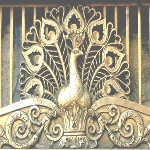

In [0]:

from IPython.display import Image
Image('messigray.jpg',width=200, height=200)

In [0]:
print(y_train[200])

[1. 0. 0. 0.]


In [0]:
model = Sequential()
model.add(Conv2D(32,3, strides = (1,1), activation = 'relu', input_shape=(img_height,img_width,3)))
model.add(MaxPooling2D((3,3), strides = (3,3)))

model.add(Conv2D(72,5, strides = (1,1), activation = 'relu'))
model.add(MaxPooling2D((3,3), strides = (3,3)))

model.add(Flatten())

model.add(Dense(7200, use_bias = True))

model.add(Dense(1024, use_bias = True))

model.add((Dense(4, use_bias= True,activation = 'softmax')))


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
train_datagen = ImageDataGenerator(
    rotation_range  = 10,
    shear_range     = 10, # 10 degrees
    zoom_range      = 0.1,
    fill_mode       = 'reflect',
    horizontal_flip = True)



```
Generator Code
```



In [0]:
'''
i = 0;
for X_batch, Y_batch in train_datagen.flow(x_train, y_train, batch_size=360):
  print(X_batch.shape , Y_batch.shape)
  break;
for x_batch, y_batch in train_datagen.flow(x_train, y_train, batch_size=360):
  if i == 10:
    break
  X_batch = np.concatenate((X_batch, x_batch), axis=0)
  Y_batch = np.concatenate((Y_batch, y_batch), axis=0)
  print(X_batch.shape , Y_batch.shape)
  i = i + 1  
'''

'\ni = 0;\nfor X_batch, Y_batch in train_datagen.flow(x_train, y_train, batch_size=360):\n  print(X_batch.shape , Y_batch.shape)\n  break;\nfor x_batch, y_batch in train_datagen.flow(x_train, y_train, batch_size=360):\n  if i == 10:\n    break\n  X_batch = np.concatenate((X_batch, x_batch), axis=0)\n  Y_batch = np.concatenate((Y_batch, y_batch), axis=0)\n  print(X_batch.shape , Y_batch.shape)\n  i = i + 1  \n'

In [0]:

#cv2.imwrite('messigray.jpg',X_batch[10])


In [0]:
#Image('messigray.jpg',width=150, height=150)

In [0]:
%%time
train_generator = train_datagen.flow(
    x_train,
    y_train,
    batch_size  = batch_size)

CPU times: user 18.3 ms, sys: 36.5 ms, total: 54.8 ms
Wall time: 58.2 ms


In [0]:
model.compile(
    optimizer   = 'adam',
    loss        = 'mean_squared_error', 
    metrics     = ['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 72)        57672     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 72)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 7200)              116647200 
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              7373824   
__________

In [0]:
%%time
model.fit_generator(
    generator = train_generator,
    steps_per_epoch     = len(x_train) // 32,
    epochs = 10,
    validation_data =(x_test, y_test))

Epoch 1/10
11/11 [==============================] - 6s 503ms/step - loss: 0.3703 - acc: 0.2593 - val_loss: 0.3750 - val_acc: 0.2500
Epoch 2/10
11/11 [==============================] - 2s 195ms/step - loss: 0.3772 - acc: 0.2456 - val_loss: 0.3750 - val_acc: 0.2500
Epoch 3/10
11/11 [==============================] - 2s 191ms/step - loss: 0.3732 - acc: 0.2536 - val_loss: 0.3750 - val_acc: 0.2500
Epoch 4/10
11/11 [==============================] - 2s 192ms/step - loss: 0.3918 - acc: 0.2165 - val_loss: 0.3750 - val_acc: 0.2500
Epoch 5/10
11/11 [==============================] - 2s 191ms/step - loss: 0.3757 - acc: 0.2487 - val_loss: 0.3750 - val_acc: 0.2500
Epoch 6/10
11/11 [==============================] - 2s 218ms/step - loss: 0.3728 - acc: 0.2544 - val_loss: 0.3750 - val_acc: 0.2500
Epoch 7/10
 4/11 [=========>....................] - ETA: 1s - loss: 0.3711 - acc: 0.2578

KeyboardInterrupt: ignored

In [0]:
model_json = model.to_json()
with open("drive/My Drive/vision_dataset/cnn_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("drive/My Drive/vision_dataset/cnn_model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
image = cv2.imread("leather_moderate_001_new.jpg")
image = cv2.resize(image, (img_height, img_width)) 

error: ignored

In [0]:
x = []
x.append(image)
x = np.array(x)
print((model.predict(x)))

In [0]:
y_pred = model.predict_classes(x_test)


In [0]:
print(y_pred)